In [1]:
############################ EXERCICE 1 ############################

class Palindrome:

#    no need to use a constructor for this case : we only need CLASS attributes (no INSTANCE attribute necessity)
#    def __init__(self):
#        self.string = ''

    def reverse(self,string):
        return string[::-1]

    def isPalindrome(self,string):
        return self.reverse(string) == string

a = Palindrome()

# Check various strings
strings = ['azer','aza','', 'gahohag']
[ 'Input string: "'+s+ '" ; Reverse: "'+a.reverse(s)+ '" ; Palindrome? ' +str(a.isPalindrome(s)) for s in strings ]

['Input string: "azer" ; Reverse: "reza" ; Palindrome? False',
 'Input string: "aza" ; Reverse: "aza" ; Palindrome? True',
 'Input string: "" ; Reverse: "" ; Palindrome? True',
 'Input string: "gahohag" ; Reverse: "gahohag" ; Palindrome? True']

In [2]:
############################ EXERCICE 2 ############################

# Recursive implementation of the sieve of Eratosthenes.
# Remark : has to be optimized for larger range but in our case it's :
# 1) beyond the scope of this no-external-support evaluation
# 2) and simply unnecessary for n = 100 000 (run in < 30 sec)
def eratosthene(n):
    if not n or n[0]**2 > n[-1]: # stop criteria
        return n
    else:
        head = n[0]
        tail = n[1::]
        for v in tail:
            if v%head == 0: # remove int that are multiple of head
                tail.remove(v)
        return [head] + eratosthene(tail)


# Compute the list of prime numbers < limit
limit = 100000
n = list(range(2,limit))
primes = eratosthene(n)

# Generate as many pseudo-random int as we have prime numbers (keys aren't asked to be sorted)
import random
keys = random.sample(range(limit), len(primes))

# Produce the dictionary
dictionary = dict(zip(keys, primes))

# Persist the dictionary in a txt file using json format
import json
json.dump( dictionary, open('ex2.txt', 'w') , indent=4 ) # ASCII is ensured by default

In [3]:
############################ EXERCICE 3 ############################

strings = [
'abababab',
'aaaaaaabab',
'ab',
'aabaabaab' ]

# A string matchs if it's composed of :
# 1) a sequence of one or multiple 'ab' pattern AND
# 2) eventually a sequence of 'a' before a 'ab' pattern
import re
pattern = '(a*ab)+'
[ re.match(pattern,s) for s in strings ]

[<_sre.SRE_Match object; span=(0, 8), match='abababab'>,
 <_sre.SRE_Match object; span=(0, 10), match='aaaaaaabab'>,
 <_sre.SRE_Match object; span=(0, 2), match='ab'>,
 <_sre.SRE_Match object; span=(0, 9), match='aabaabaab'>]

/home/christophe/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


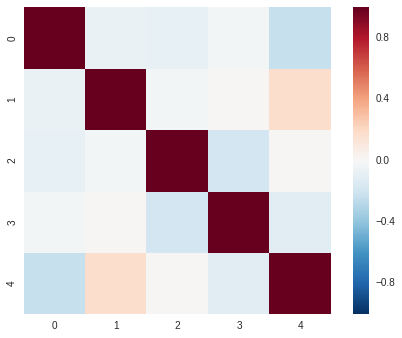

In [4]:
############################ EXERCICE 4 ############################

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Number of arrays to generate
n = 5

# Generate n numpy arrays of 100 elements from uniform [0,1[ distribution
mat = np.random.random((n, 100))

# Persist mat in a txt file (we also could have used tempfile through "from tempfile import TemporaryFile")
fileName = 'ex4.txt'
np.savetxt(fileName, mat)

# Load previously persisted file
matBack = np.loadtxt(fileName)

# Compute the covariance matrix
cov = np.cov(matBack)

# Remark : it may be interesting to plot the heatmap of the correlation matrix.
# As expected, we observe that :
# - the matrix is symetric
# - diagonal terms are equal to one
# - extra-diag terms are negligeable (random numbers have been generated independently)

# Compute the covariance matrix
corr = np.corrcoef(matBack)

# Draw the heatmap using seaborn
sns.heatmap(corr, square=True)
